In [1]:
import fiona
import rasterio
from rasterio import transform, warp, mask
import pandas as pd
import geopandas as gp
import numpy as np
import math
import ipympl
import matplotlib.pyplot as plt
import matplotlib as mlp
import scipy.ndimage as ndi
import re

%matplotlib inline

In [2]:
map_filename = "../../../../Covariates and Other Data/Geospatial Covariates/Malaria Atlas Project/map_pv_incidence_mean_1y_2017_00_00.tif"
map_raster = rasterio.open(map_filename)
map_raster.bounds

BoundingBox(left=-180.0, bottom=-89.99999999999281, right=179.99999999998562, top=90.0)

In [4]:
malap = map_raster.read(1)
malap.shape

(4320, 8640)

In [103]:
map_raster.transform

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2885: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


[-180.0, 0.041666666666665, 0.0, 90.0, 0.0, -0.041666666666665]

In [55]:
wpgt_file = "../../../../../DATOS/WorldPop/GTM_ppp_v2b_2010/GTM_ppp_v2b_2010.tif"
wpgt_r = rasterio.open(wpgt_file)
wpgt = wpgt_r.read(1)
wpgt_r.bounds

BoundingBox(left=-92.24071231229665, bottom=13.738426751815744, right=-88.22087311229664, top=17.81909685181575)

In [6]:
malap

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

In [7]:
map_reproj = np.empty(wpgt.shape, dtype='float32')

In [81]:
warp.reproject(source = malap, src_crs = map_raster.crs, src_transform = map_raster.affine,
               destination = map_reproj, dst_crs = wpgt_r.crs, dst_transform = wpgt_r.affine,
               resampling=warp.Resampling.nearest,
               num_threads=2)
map_reproj = map_reproj * wpgt

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


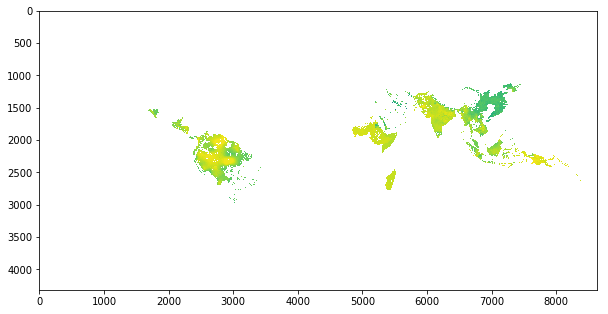

In [99]:
#plt.hist(map_reproj.flatten(), range=(0.01,0.04))
plt.imshow(np.log(malap[]))

In [11]:
munis = gp.read_file("../../../../Covariates and Other Data/GIS/GT-IGN-cartografia_basica-Division politica Administrativa (Municipios).geojson")
munis = munis[munis.COD_DEPT__.isna() == False]
deptos = gp.read_file("../../../../Covariates and Other Data/GIS/GT-IGN-cartografia_basica-Departamentos.geojson")
deptos = deptos[deptos.CODIGO != "2300"]

In [46]:
deptos

,PERIMETER,DEPARTAMEN,AREA,CODIGO,geometry
1,299743.398,Alta Verapaz,2269.034,1600,POLYGON ((-90.40980866246851 16.06946662015937...
2,253395.199,Izabal,1202.53,1800,POLYGON ((-88.53270522426156 15.92570895428536...
3,85727.066,Huehuetenango,189.536,1300,POLYGON ((-91.11944272478235 15.99574010610228...
4,186938.244,Baja Verapaz,675.916,1500,POLYGON ((-90.63282591512235 15.29192459684706...
5,50539.37,Quiché,112.263,1400,POLYGON ((-90.43428453772934 16.06277256858555...
6,74860.615,San Marcos,120.544,1200,POLYGON ((-92.02737494992475 15.26813602384649...
7,83360.456,Totonicapán,244.535,800,POLYGON ((-91.31595758277054 15.23578297563872...
8,84412.538,Progreso,218.243,200,POLYGON ((-89.93963051084381 15.14023258824544...
9,58916.006,Sololá,151.369,700,POLYGON ((-91.14753243039299 14.86734552691748...
10,55869.986,Quetzaltenango,126.831,900,POLYGON ((-91.51455911111773 15.17128236662688...


In [56]:
def malapWp(muni):
    masked, affine = mask.mask(wpgt_r, [muni["geometry"].__geo_interface__], crop=False)
    valid_cells = masked.data>0
    pop = np.sum(masked.data[valid_cells])
    incidence = map_reproj[valid_cells]
munis_malap_masks = [malapWp(muni) for i, muni in munis.iterrows()]

AttributeError: 'numpy.ndarray' object has no attribute 'nodata'

In [80]:
#mlp.rcParams["figure.figsize"] = (10,10)
#plt.imshow(munis_malap_masks[2][0].data[0], vmin=0)
#map_reproj[mask.mask(wpgt_r, [munis.loc[2]["geometry"].__geo_interface__])[0].mask[0]]
#plt.hist(mask.mask(wpgt_r, [munis.loc[100]["geometry"].__geo_interface__], crop=True)[0].mask[0].astype(int))
#plt.colorbar()
m = mask.mask(wpgt_r, [munis.loc[100]["geometry"].__geo_interface__], all_touched=True)[0].mask[0].astype(int)
plt.hist(m.flatten())

IndexError: index 1 is out of bounds for axis 0 with size 1

In [39]:
munis_malap_sums = [np.mean(mask[0].data[mask[0].data>0]) for mask in munis_malap_masks]

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


In [42]:
munis["malap_sum"] = munis_malap_sums

In [68]:
munis.malap_sum.sum()*100

31.10001136180379

C:\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


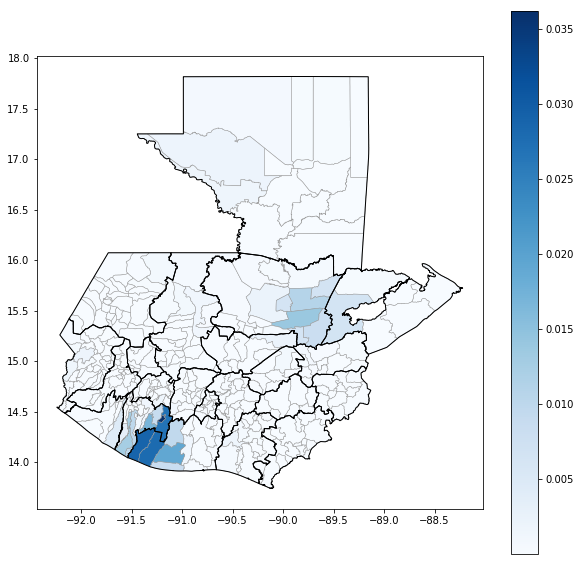

In [46]:
mlp.rcParams["figure.figsize"] = (10,10)
ax = munis.plot("malap_sum", legend=True, cmap = "Blues", edgecolor="#999999", linewidth=0.5)
deptos.plot(edgecolor="black", linewidth=1, color="#55555500", ax = ax )

(-92.44118572530694,
 -88.02056507210258,
 13.535444278930052,
 18.023456427768483)

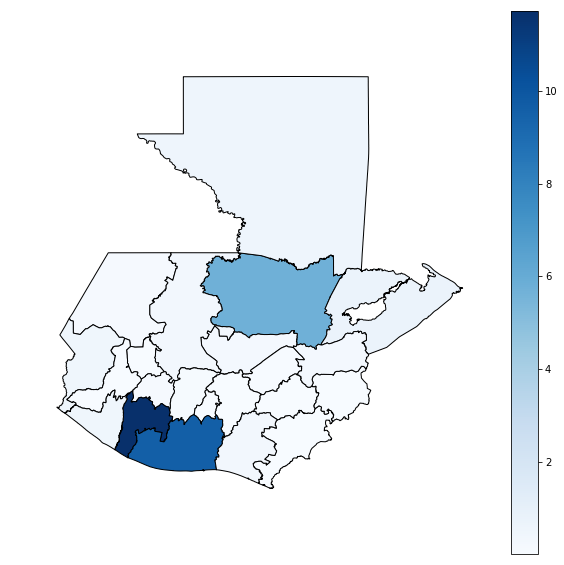

In [70]:
#ax = munis.plot("malap_sum", legend=True)
#deptos.plot(edgecolor="black", linewidth=2, color="#55555500", ax = ax )

deptos.assign(CODIGO = lambda x: np.floor(x.CODIGO.astype(int)/100))\
    .merge(munis.groupby("COD_DEPT__").malap_sum.sum().map(lambda x: x*100)\
           .reset_index().assign(COD_DEPT__ = lambda x: x.COD_DEPT__.astype(int)),
             left_on="CODIGO", right_on = "COD_DEPT__").plot("malap_sum", cmap = "Blues", edgecolor="black",
                                                            linewidth=1, legend=True)
plt.axis("off")